In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn import tree
import joblib

In [63]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [64]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

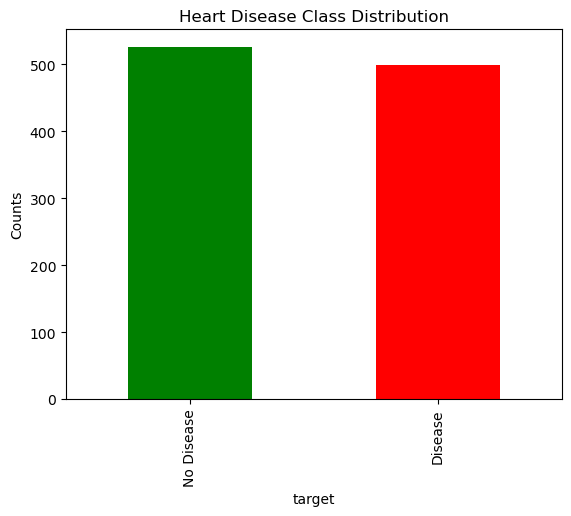

In [65]:
df['target'].value_counts().plot(kind='bar',color=['green','red'])
plt.title('Heart Disease Class Distribution')
plt.xticks([0,1],['No Disease','Disease'])
plt.ylabel('Counts')
plt.show()

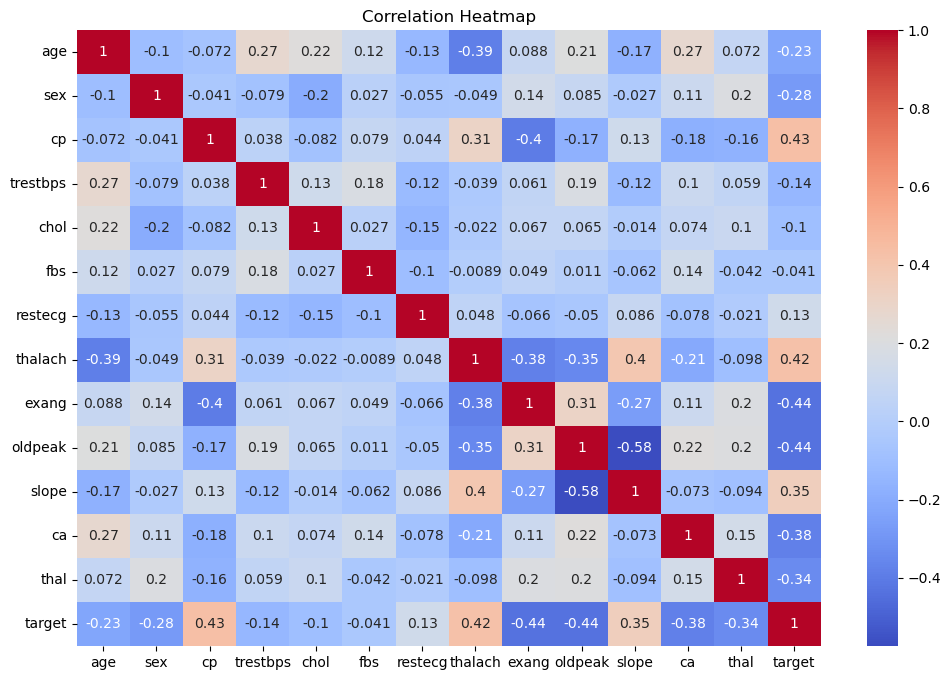

In [66]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [67]:
X = df.drop('target',axis='columns')
Y = df['target']

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [69]:
model = DecisionTreeClassifier(criterion = "gini",max_depth = 6,random_state = 42)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [70]:
y_pred = model.predict(X_test)

In [71]:
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification Report:]\n", classification_report(y_test,y_pred))

Accuracy: 0.8829268292682927
Confusion Matrix:
 [[83 19]
 [ 5 98]]
Classification Report:]
               precision    recall  f1-score   support

           0       0.94      0.81      0.87       102
           1       0.84      0.95      0.89       103

    accuracy                           0.88       205
   macro avg       0.89      0.88      0.88       205
weighted avg       0.89      0.88      0.88       205



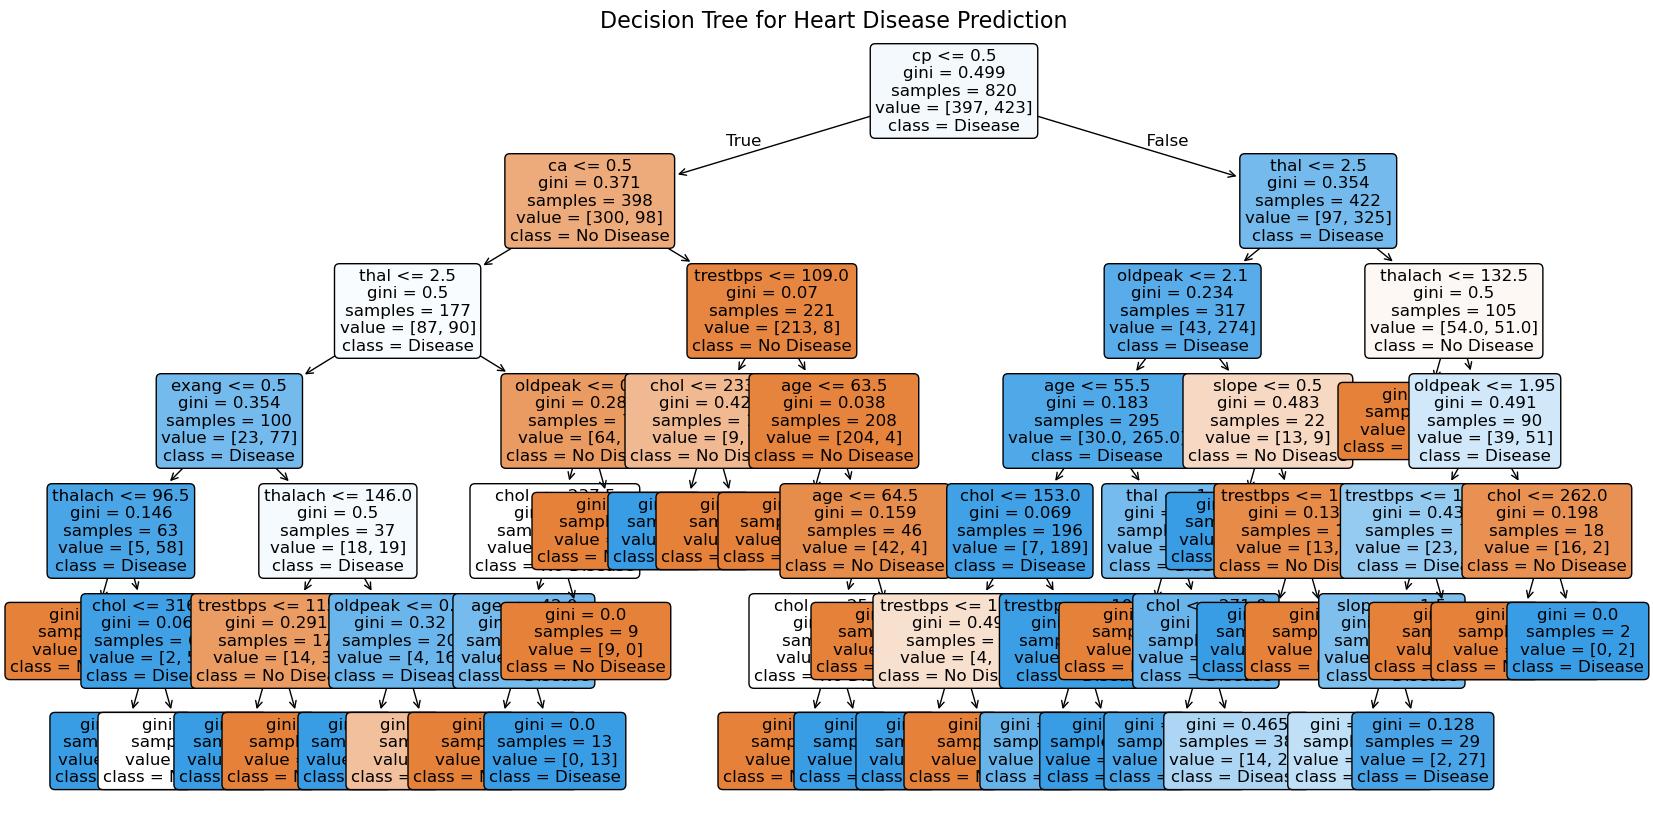

In [72]:
plt.figure(figsize=(20, 10))
tree.plot_tree(
    model,
    filled=True,                    
    feature_names=X.columns,        
    class_names=["No Disease", "Disease"], 
    rounded=True,                   
    fontsize=12                     
)
plt.title("Decision Tree for Heart Disease Prediction", fontsize=16)
plt.show()

In [73]:
joblib.dump(model,"heart_disease_decision_tree.pkl")

['heart_disease_decision_tree.pkl']